## PRACTICAL DATA SCIENCE (Prof. Stephanie Langeland)
### Submitted by: Rishika Rachel Manda
### Objective: Predicting whether patients will show up on their scheduled appointment days using Machine Learning models

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/RACHAEL/Desktop/KaggleV2-May-2016.csv", encoding='ISO-8859-1')


In [3]:
data.shape

(110527, 14)

In [4]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
# Data cleaning

data = data[data['Age'] >= 0]

In [6]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172538e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438960e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [8]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872500000000.000,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558998000000000.000,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262960000000.000,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951000000.000,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841190000000.000,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572130000000.000,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596270000000.000,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576600000000.000,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134900000000.000,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [9]:
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [10]:
data.isnull()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110523,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110524,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110525,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])


C:\Users\RACHAEL\AppData\Local\Temp\ipykernel_22732\2515655886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
C:\Users\RACHAEL\AppData\Local\Temp\ipykernel_22732\2515655886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])


In [14]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872500000000.000,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558998000000000.000,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262960000000.000,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951000000.000,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841190000000.000,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
# Label Encoding for Gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Custom Binary Encoding for No-show
data['No-show'] = data['No-show'].map({'Yes': 1, 'No': 0})


C:\Users\RACHAEL\AppData\Local\Temp\ipykernel_22732\3751485470.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = le.fit_transform(data['Gender'])
C:\Users\RACHAEL\AppData\Local\Temp\ipykernel_22732\3751485470.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['No-show'] = data['No-show'].map({'Yes': 1, 'No': 0})


In [16]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872500000000.000,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558998000000000.000,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262960000000.000,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951000000.000,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841190000000.000,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [17]:
data.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                          int32
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                         int64
dtype: object

In [18]:
data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace=True)

C:\Users\RACHAEL\AppData\Local\Temp\ipykernel_22732\1062968375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace=True)


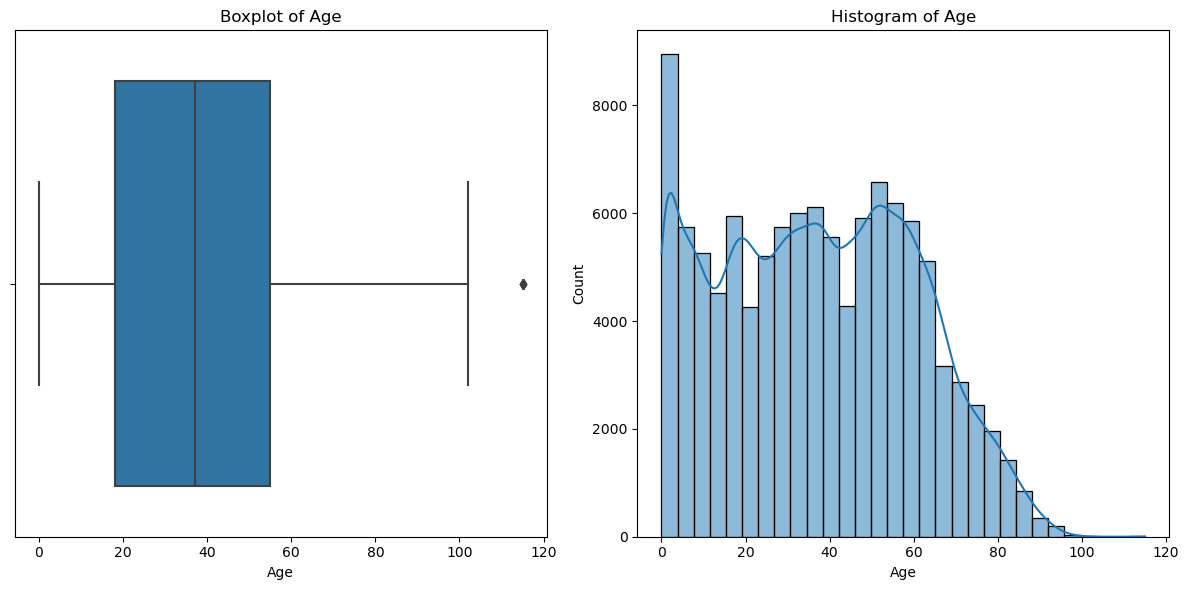

Value counts for Handicap column:
0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64


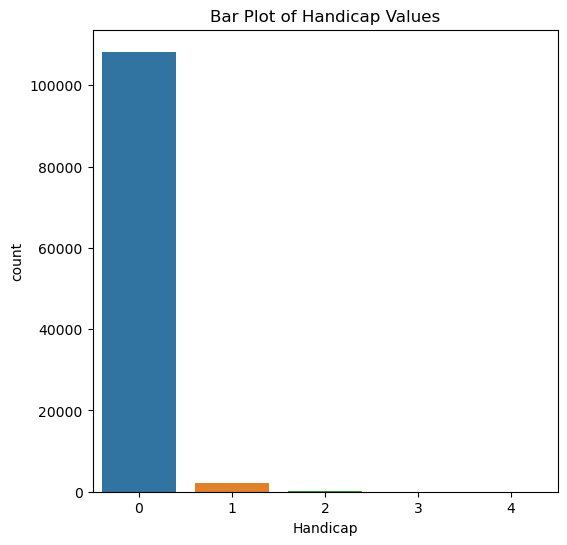

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age Column
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Histogram of Age')

plt.tight_layout()
plt.show()

# Handicap Column
# Getting the value counts
print("Value counts for Handicap column:")
print(data['Handicap'].value_counts())

# Visualizing the value counts
plt.figure(figsize=(6, 6))
sns.countplot(x='Handicap', data=data)
plt.title('Bar Plot of Handicap Values')
plt.show()


Value counts for Handicap column:
0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64


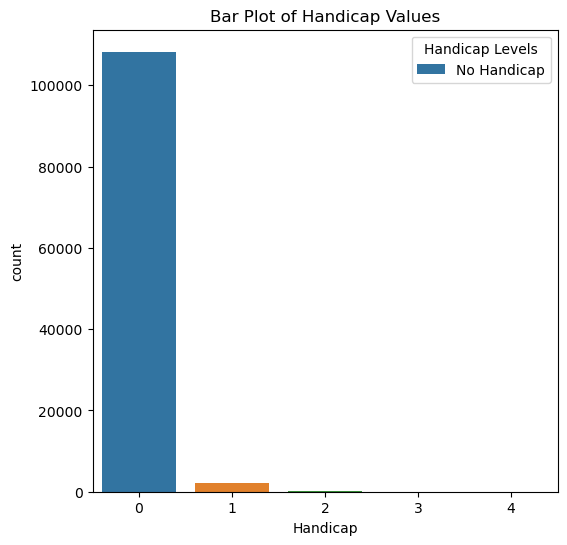

In [20]:
# Handicap Column
# Getting the value counts
print("Value counts for Handicap column:")
print(data['Handicap'].value_counts())

# Visualizing the value counts
plt.figure(figsize=(6, 6))
handicap_plot = sns.countplot(x='Handicap', data=data)
plt.title('Bar Plot of Handicap Values')

# Adding a legend
handicap_legend_labels = ['No Handicap', 'Handicap Level 1', 'Handicap Level 2', 'Handicap Level 3', 'Handicap Level 4']
plt.legend(title='Handicap Levels', labels=handicap_legend_labels, loc='upper right')

plt.show()


In [21]:
# Assuming ages above 100 are outliers and removing them
data = data[data['Age'] <= 100]

In [22]:
# Binning the Handcap levels 3 and 4 into a single category (3)
data['Handicap'] = data['Handicap'].apply(lambda x: 3 if x >= 3 else x)


C:\Users\RACHAEL\AppData\Local\Temp\ipykernel_22732\2920739107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Handicap'] = data['Handicap'].apply(lambda x: 3 if x >= 3 else x)


In [23]:
data.shape

(110519, 14)

In [24]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872500000000.000,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558998000000000.000,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262960000000.000,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951000000.000,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841190000000.000,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [25]:
# Feature Engineering - Creating new feature 'waiting time'
data['WaitingTime'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days
data

C:\Users\RACHAEL\AppData\Local\Temp\ipykernel_22732\646570260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WaitingTime'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,WaitingTime
0,29872500000000.000,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,558998000000000.000,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,4262960000000.000,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,867951000000.000,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,8841190000000.000,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572130000000.000,5651768,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,34
110523,3596270000000.000,5650093,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,34
110524,15576600000000.000,5630692,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,40
110525,92134900000000.000,5630323,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,40


In [26]:
counting = (data['WaitingTime'] == -1).sum()
print(counting)

38560


In [27]:

# Drop the rows where 'WaitingTime' is -1

data.drop(data[data['WaitingTime'] == -1].index, inplace=True)

C:\Users\RACHAEL\AppData\Local\Temp\ipykernel_22732\3014479945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['WaitingTime'] == -1].index, inplace=True)


In [28]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,WaitingTime
5,95985100000000.000,5626772,0,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPï¿½ï¿½B,0,1,0,0,0,0,0,1
6,733688000000000.000,5630279,0,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,1
7,3449830000000.000,5630575,0,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,1
9,78124600000000.000,5629123,0,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0,1
10,734536000000000.000,5630213,0,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0,1


In [29]:
print(data['WaitingTime'].min())
print(data['WaitingTime'].max())

-7
178


In [30]:
counting_again = (data['WaitingTime'] < 0).sum()
print(counting_again)

5


In [31]:
counting_again1 = data[data['WaitingTime'] < 0]
print(counting_again1)

                PatientId  AppointmentID  Gender              ScheduledDay  \
27033   7839270000000.000        5679978       1 2016-05-10 10:51:53+00:00   
55226   7896290000000.000        5715660       0 2016-05-18 14:50:41+00:00   
64175  24252300000000.000        5664962       0 2016-05-05 13:43:58+00:00   
71533 998232000000000.000        5686628       0 2016-05-11 13:49:20+00:00   
72362   3787480000000.000        5655637       1 2016-05-04 06:50:57+00:00   

                 AppointmentDay  Age   Neighbourhood  Scholarship  \
27033 2016-05-09 00:00:00+00:00   38    RESISTï¿½ï¿½            0   
55226 2016-05-17 00:00:00+00:00   19  SANTO ANTï¿½ï¿            0   
64175 2016-05-04 00:00:00+00:00   22    CONSOLAï¿½ï¿            0   
71533 2016-05-05 00:00:00+00:00   81  SANTO ANTï¿½ï¿            0   
72362 2016-05-03 00:00:00+00:00    7      TABUAZEIRO            0   

       Hypertension  Diabetes  Alcoholism  Handicap  SMS_received  No-show  \
27033             0         0         

In [32]:
# Drop the rows where 'WaitingTime' is less than 0

data.drop(data[data['WaitingTime'] < 0].index, inplace=True)

C:\Users\RACHAEL\AppData\Local\Temp\ipykernel_22732\1864624258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['WaitingTime'] < 0].index, inplace=True)


In [33]:
count_negatives = (data['WaitingTime'] < 0).sum()
print(count_negatives)

0


In [34]:
data.shape

(71954, 15)

In [35]:
count_noshow = (data['No-show'] == 1).sum()
print(count_noshow)

20519


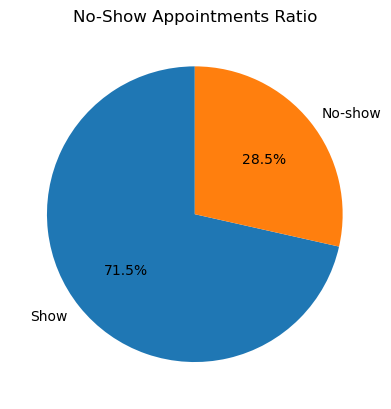

In [36]:
import matplotlib.pyplot as plt

# Count the no-shows and shows
noshow_counts = data['No-show'].value_counts()

# Create a pie chart
noshow_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Show', 'No-show'])
plt.title('No-Show Appointments Ratio')
plt.ylabel('')  # Hiding the y-label
plt.show()


C:\Users\RACHAEL\AppData\Local\Temp\ipykernel_22732\2948745352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])


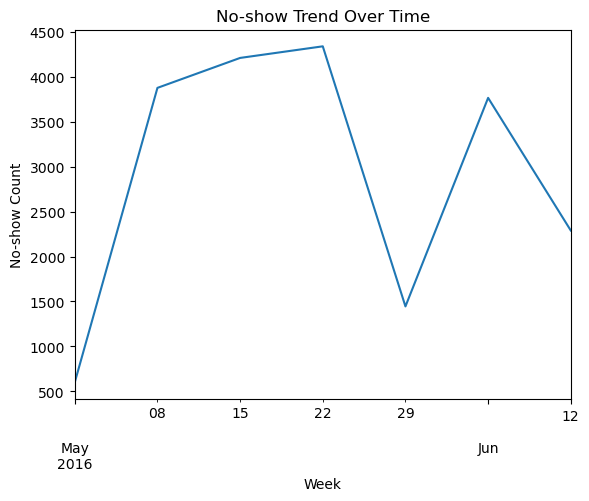

In [37]:
# Assuming AppointmentDay is converted to datetime and set as index
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data.set_index('AppointmentDay', inplace=True)

data.resample('W')['No-show'].sum().plot()  # Weekly resampling
plt.title('No-show Trend Over Time')
plt.ylabel('No-show Count')
plt.xlabel('Week')
plt.show()


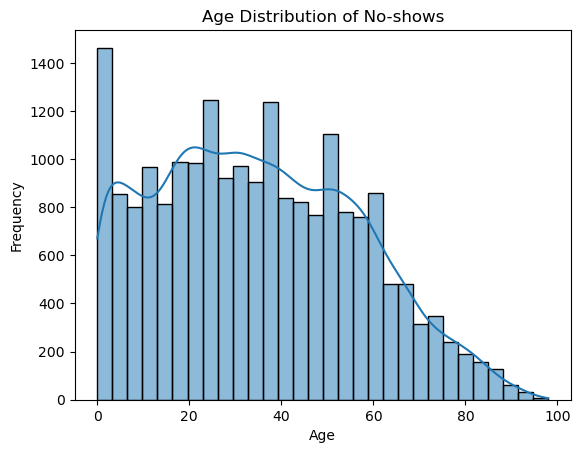

In [38]:
sns.histplot(data[data['No-show'] == 1]['Age'], bins=30, kde=True)
plt.title('Age Distribution of No-shows')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


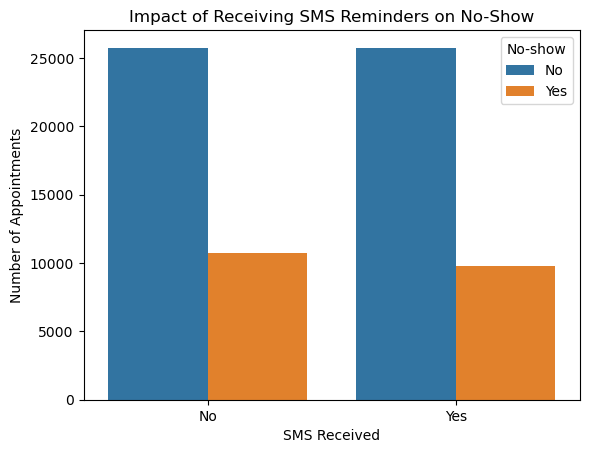

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='SMS_received', hue='No-show', data=data)
plt.title('Impact of Receiving SMS Reminders on No-Show')
plt.xlabel('SMS Received')
plt.ylabel('Number of Appointments')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='No-show', labels=['No', 'Yes'])
plt.show()


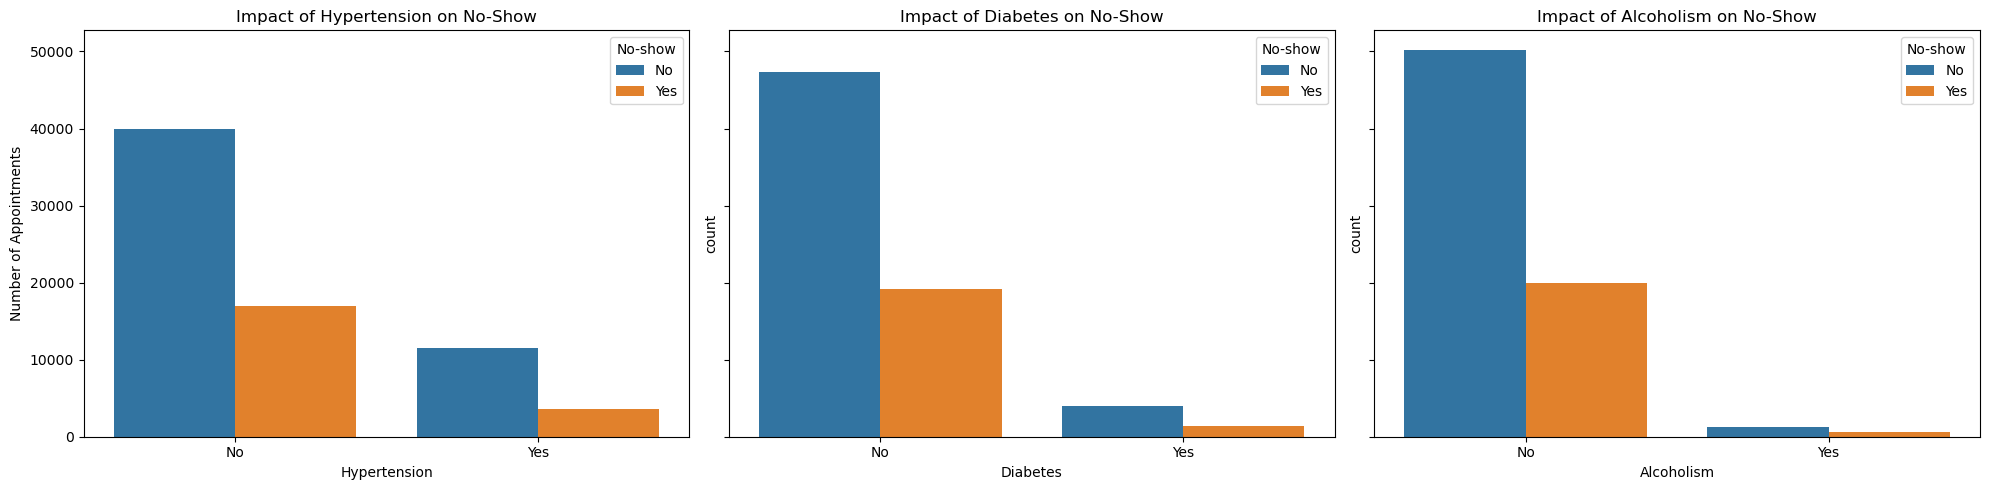

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

sns.countplot(x='Hypertension', hue='No-show', data=data, ax=axs[0])
axs[0].set_title('Impact of Hypertension on No-Show')
axs[0].set_xlabel('Hypertension')
axs[0].set_ylabel('Number of Appointments')
axs[0].set_xticklabels(['No', 'Yes'])
axs[0].legend(title='No-show', labels=['No', 'Yes'])

sns.countplot(x='Diabetes', hue='No-show', data=data, ax=axs[1])
axs[1].set_title('Impact of Diabetes on No-Show')
axs[1].set_xlabel('Diabetes')
axs[1].set_xticklabels(['No', 'Yes'])
axs[1].legend(title='No-show', labels=['No', 'Yes'])

sns.countplot(x='Alcoholism', hue='No-show', data=data, ax=axs[2])
axs[2].set_title('Impact of Alcoholism on No-Show')
axs[2].set_xlabel('Alcoholism')
axs[2].set_xticklabels(['No', 'Yes'])
axs[2].legend(title='No-show', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


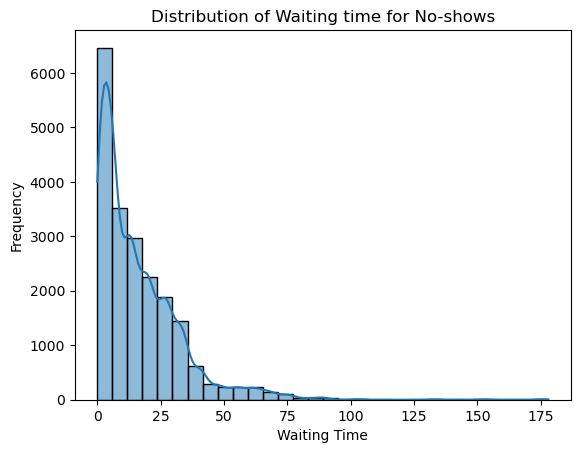

In [41]:
# Assuming there's a 'Waiting_Days' column
sns.histplot(data[data['No-show'] == 1]['WaitingTime'], bins=30, kde=True)
plt.title('Distribution of Waiting time for No-shows')
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')
plt.show()


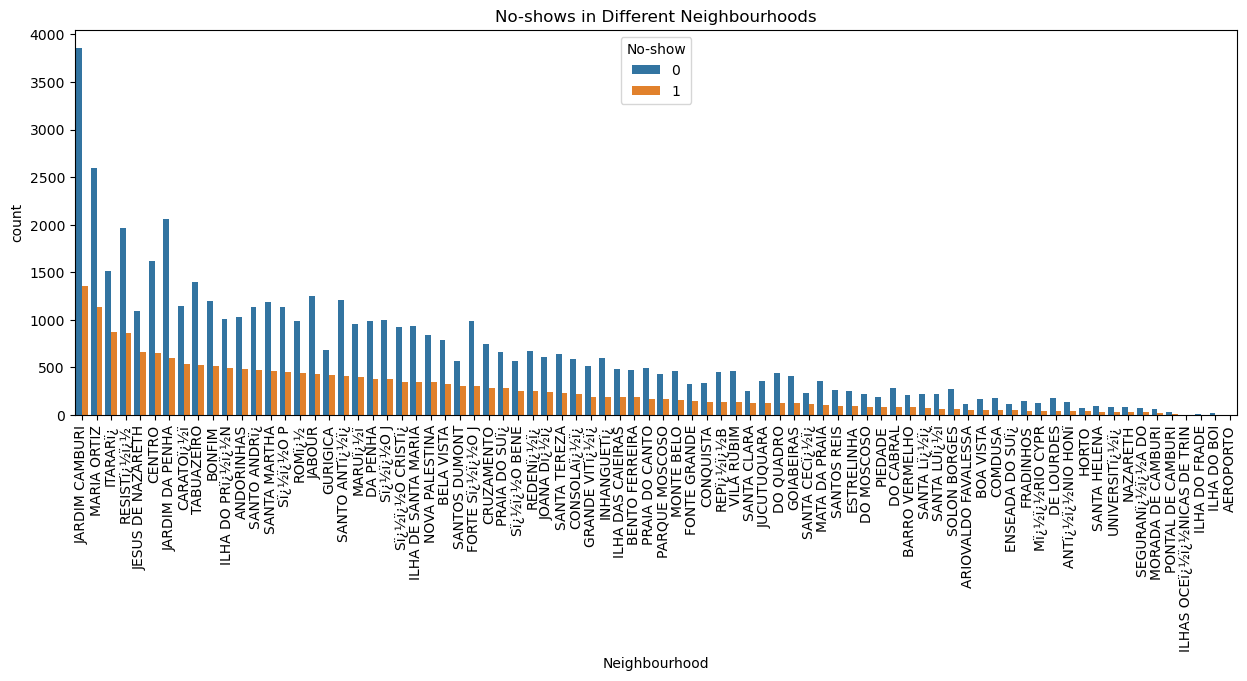

In [42]:
plt.figure(figsize=(15,5))
order = data.groupby('Neighbourhood')['No-show'].sum().sort_values(ascending=False).index
sns.countplot(x='Neighbourhood', hue='No-show', data=data, order=order)
plt.xticks(rotation=90)
plt.title('No-shows in Different Neighbourhoods')
plt.show()


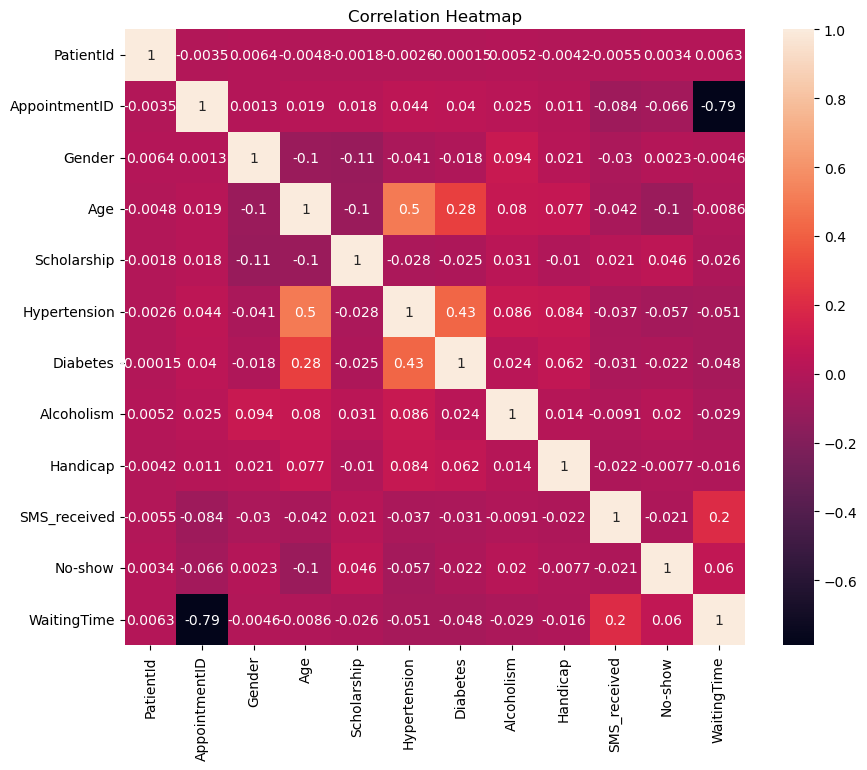

In [43]:
correlation_matrix = data.corr()

# Set the figure size using plt.figure()
plt.figure(figsize=(10, 8)) 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Heatmap')
plt.show()


In [44]:
# Assuming 'correlation_matrix' is your DataFrame
threshold = 0.5  # You can adjust this threshold as needed

# Iterate over the DataFrame to find positive correlations
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > threshold:  # Checks if correlation is positive and above the threshold
            print(f"{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")


Hypertension and Age: 0.50


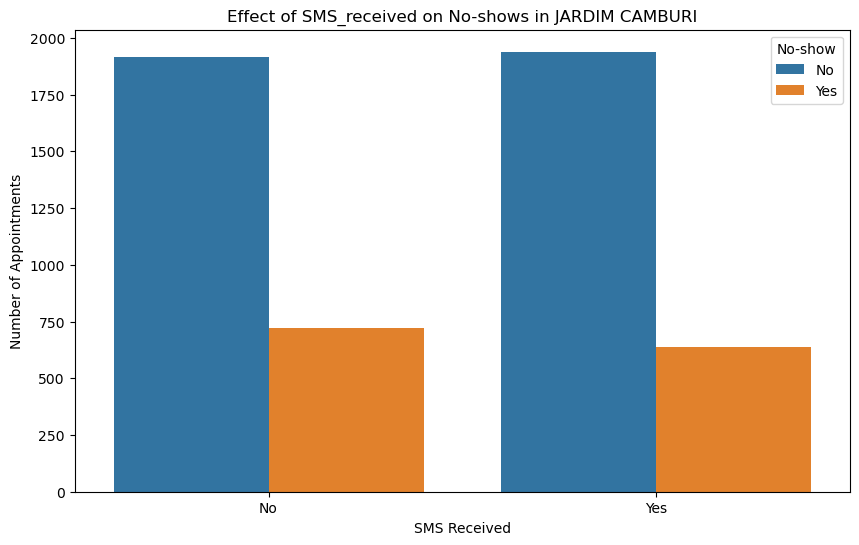

In [45]:

# Filtering the data to include only rows where the Neighbourhood is 'JARDIM CAMBURI'
jardim_camburi_data = data[data['Neighbourhood'] == 'JARDIM CAMBURI']

# Creating a countplot to visualize the no-shows based on SMS_received
plt.figure(figsize=(10, 6))
sns.countplot(x='SMS_received', hue='No-show', data=jardim_camburi_data)
plt.title('Effect of SMS_received on No-shows in JARDIM CAMBURI')
plt.xlabel('SMS Received')
plt.ylabel('Number of Appointments')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='No-show', labels=['No', 'Yes'])
plt.show()


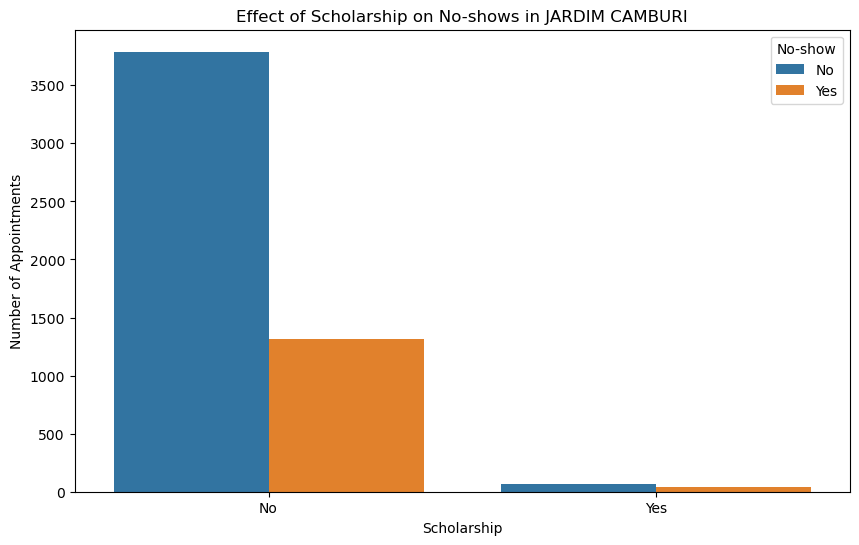

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering the data to include only rows where the Neighbourhood is 'JARDIM CAMBURI'
jardim_camburi_data = data[data['Neighbourhood'] == 'JARDIM CAMBURI']

# Creating a countplot to visualize the no-shows based on Scholarship
plt.figure(figsize=(10, 6))
sns.countplot(x='Scholarship', hue='No-show', data=jardim_camburi_data)
plt.title('Effect of Scholarship on No-shows in JARDIM CAMBURI')
plt.xlabel('Scholarship')
plt.ylabel('Number of Appointments')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='No-show', labels=['No', 'Yes'])
plt.show()



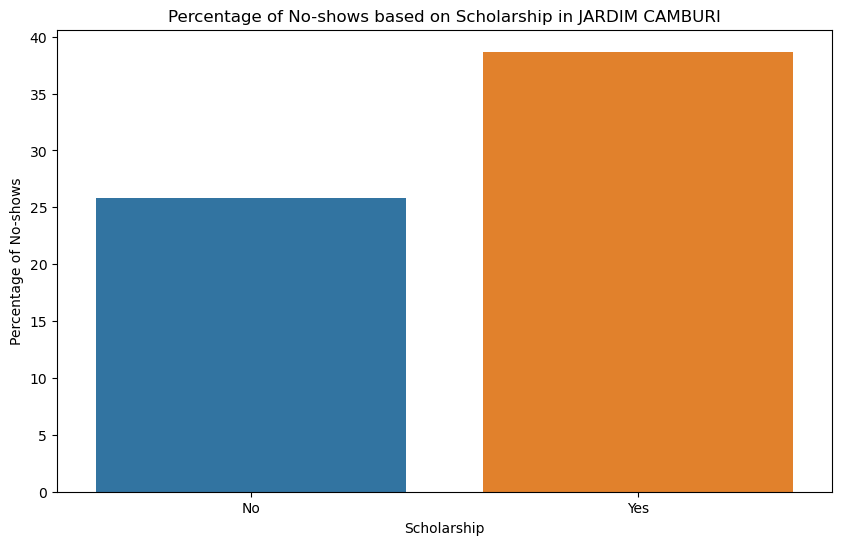

In [47]:
import matplotlib.pyplot as plt

# Grouping by Scholarship and getting the mean of No-shows (assuming No-show column is binary where 'Yes' is 1 and 'No' is 0)
percentage_data = jardim_camburi_data.groupby('Scholarship')['No-show'].mean().reset_index()

# Converting the means to percentages
percentage_data['No-show'] = percentage_data['No-show'] * 100

# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Scholarship', y='No-show', data=percentage_data)
plt.title('Percentage of No-shows based on Scholarship in JARDIM CAMBURI')
plt.xlabel('Scholarship')
plt.ylabel('Percentage of No-shows')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


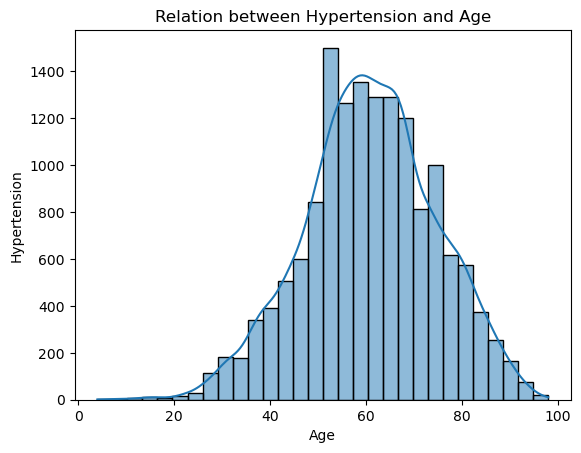

In [48]:
sns.histplot(data[data['Hypertension'] == 1]['Age'], bins=30, kde=True)
plt.title('Relation between Hypertension and Age')
plt.xlabel('Age')
plt.ylabel('Hypertension')
plt.show()


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import plot_tree

In [50]:
print(data.dtypes)

PatientId                    float64
AppointmentID                  int64
Gender                         int32
ScheduledDay     datetime64[ns, UTC]
Age                            int64
Neighbourhood                 object
Scholarship                    int64
Hypertension                   int64
Diabetes                       int64
Alcoholism                     int64
Handicap                       int64
SMS_received                   int64
No-show                        int64
WaitingTime                    int64
dtype: object


**Value counts to check for class imbalance**

In [51]:
class_distribution = data['No-show'].value_counts()
print(class_distribution)


0    51435
1    20519
Name: No-show, dtype: int64


In [52]:
print(51435-20519)

30916


In [53]:
class_counts = data['No-show'].value_counts()
class_ratio = class_counts.min() / class_counts.max()
print("Class Ratio:", class_ratio)


Class Ratio: 0.3989306892194031


In [54]:
data.shape

(71954, 14)

In [55]:
X = data.drop(['No-show', 'ScheduledDay', 'Neighbourhood'], axis=1)  # Features
y = data['No-show']
X.head()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitingTime
AppointmentDay,,,,,,,,,,,
2016-04-29 00:00:00+00:00,95985100000000.000,5626772,0,76,0,1,0,0,0,0,1
2016-04-29 00:00:00+00:00,733688000000000.000,5630279,0,23,0,0,0,0,0,0,1
2016-04-29 00:00:00+00:00,3449830000000.000,5630575,0,39,0,0,0,0,0,0,1
2016-04-29 00:00:00+00:00,78124600000000.000,5629123,0,19,0,0,0,0,0,0,1
2016-04-29 00:00:00+00:00,734536000000000.000,5630213,0,30,0,0,0,0,0,0,1


In [56]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [58]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [59]:
print(y_train_smote.value_counts())


0    41148
1    41148
Name: No-show, dtype: int64


In [60]:
import pandas as pd

# Check the class distribution
class_distribution = y_train_smote.value_counts()
print("Class distribution after SMOTE:\n", class_distribution)

# Calculate the ratio
class_ratio = class_distribution.min() / class_distribution.max()
print("Class Ratio:", class_ratio)


Class distribution after SMOTE:
 0    41148
1    41148
Name: No-show, dtype: int64
Class Ratio: 1.0


In [61]:
# Perform feature scaling/normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_train_smote)

**Feature Selection: Select Features to Reduce Dimensionality**

In [62]:
from sklearn.feature_selection import SelectKBest, f_classif

# Instantiate the feature selector
selector = SelectKBest(score_func=f_classif, k=5)

# Fit the selector to the data and transform the features
x_new = selector.fit_transform(X_train_smote, y_train_smote)

# Get the mask of selected features
mask = selector.get_support()

# Get the names of the selected columns
selected_columns = X_train_smote.columns[mask]

print(selected_columns)

Index(['Gender', 'Age', 'Hypertension', 'Diabetes', 'SMS_received'], dtype='object')


In [63]:
X_train_smote = data.drop(['PatientId', 'Alcoholism', 'Handicap', 'AppointmentID', 'Scholarship', 'ScheduledDay', 'WaitingTime', 'Neighbourhood', 'No-show'], axis=1)

In [64]:
X_train_smote.head()

,Gender,Age,Hypertension,Diabetes,SMS_received
AppointmentDay,,,,,
2016-04-29 00:00:00+00:00,0,76,1,0,0
2016-04-29 00:00:00+00:00,0,23,0,0,0
2016-04-29 00:00:00+00:00,0,39,0,0,0
2016-04-29 00:00:00+00:00,0,19,0,0,0
2016-04-29 00:00:00+00:00,0,30,0,0,0


In [65]:
y_train_smote.head()

0    0
1    1
2    0
3    0
4    1
Name: No-show, dtype: int64

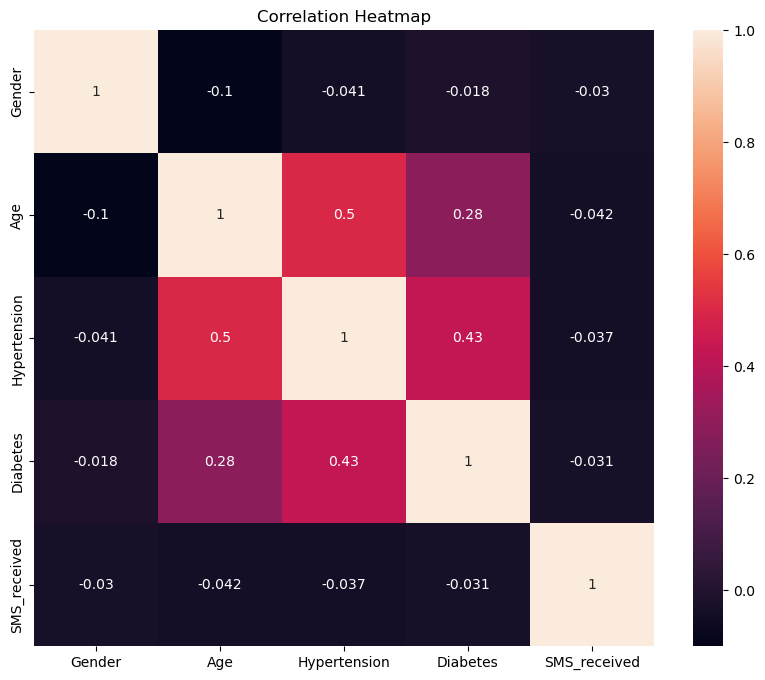

In [66]:
correlation_matrix = X_train_smote.corr()

# Set the figure size using plt.figure()
plt.figure(figsize=(10, 8)) 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Heatmap')
plt.show()

**Implementing Logistic Regression**

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score


In [68]:
logreg = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter if needed

In [69]:
print("Shape of X_train_smote:", X_train_smote.shape)
print("Shape of y_train_smote:", y_train_smote.shape)


Shape of X_train_smote: (71954, 5)
Shape of y_train_smote: (82296,)


In [70]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (57563, 11)
Shape of y_train: (57563,)


In [71]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the shapes again
print("Shape of X_train_smote after resampling:", X_train_smote.shape)
print("Shape of y_train_smote after resampling:", y_train_smote.shape)


Shape of X_train_smote after resampling: (82296, 11)
Shape of y_train_smote after resampling: (82296,)


In [72]:
logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42)

In [73]:
y_pred_logreg = logreg.predict(X_test)

In [74]:
# Classification Report
print("Accuracy: ")
print(accuracy_score(y_test, y_pred_logreg))

print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

# ROC-AUC Score
print("ROC-AUC Score:")
print(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))


Accuracy: 
0.2851782363977486
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10287
           1       0.29      1.00      0.44      4104

    accuracy                           0.29     14391
   macro avg       0.14      0.50      0.22     14391
weighted avg       0.08      0.29      0.13     14391

Confusion Matrix:
[[    0 10287]
 [    0  4104]]
ROC-AUC Score:
0.5000449928191508


C:\Users\RACHAEL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RACHAEL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RACHAEL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_smote, y_train_smote)
y_pred_dt = dt_classifier.predict(X_test)


In [77]:
# Classification Report
print("Accuracy:")
print(accuracy_score(y_test, y_pred_dt))

print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))

# ROC-AUC Score
print("ROC-AUC Score for Decision Tree:")
print(roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1]))


Accuracy:
0.5770273087346258
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.74      0.63      0.68     10287
           1       0.32      0.44      0.37      4104

    accuracy                           0.58     14391
   macro avg       0.53      0.53      0.53     14391
weighted avg       0.62      0.58      0.59     14391

Confusion Matrix for Decision Tree:
[[6511 3776]
 [2311 1793]]
ROC-AUC Score for Decision Tree:
0.5349128051245056


In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf_classifier = RandomForestClassifier(random_state=42)

In [80]:
rf_classifier.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_classifier.predict(X_test)

In [81]:
# Classification Report
print("Accuracy: ")
print(accuracy_score(y_test, y_pred_rf))

print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

# ROC-AUC Score
print("ROC-AUC Score for Random Forest:")
print(roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1]))

Accuracy: 
0.6291432145090682
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74     10287
           1       0.36      0.37      0.36      4104

    accuracy                           0.63     14391
   macro avg       0.55      0.55      0.55     14391
weighted avg       0.63      0.63      0.63     14391

Confusion Matrix for Random Forest:
[[7524 2763]
 [2574 1530]]
ROC-AUC Score for Random Forest:
0.5851608305567825


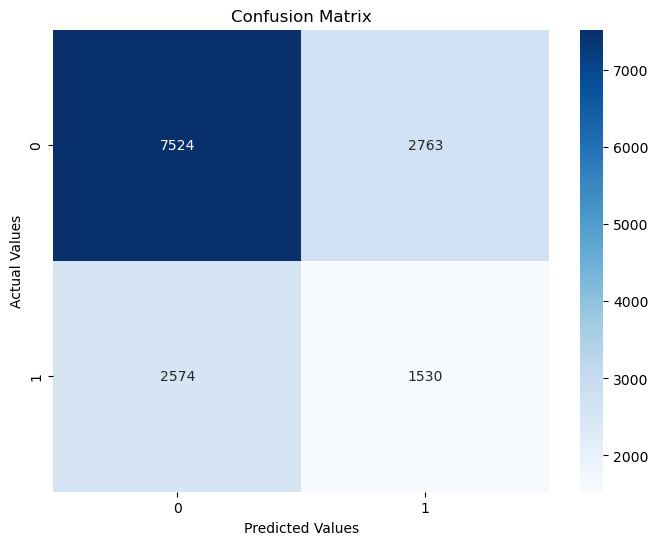

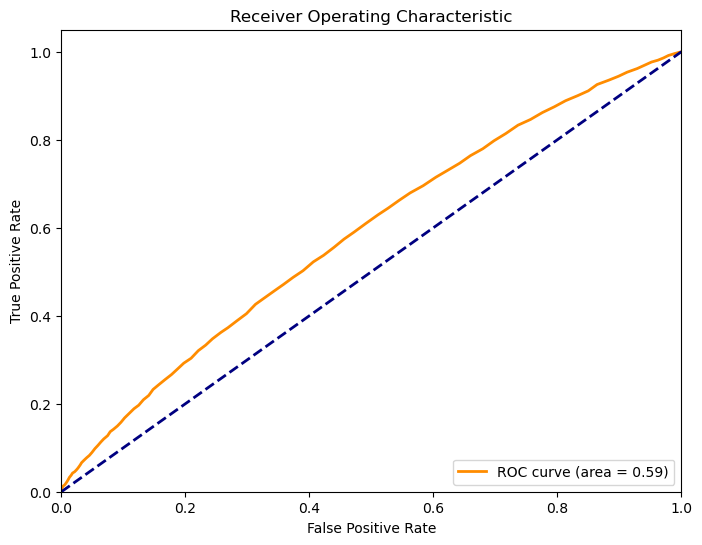

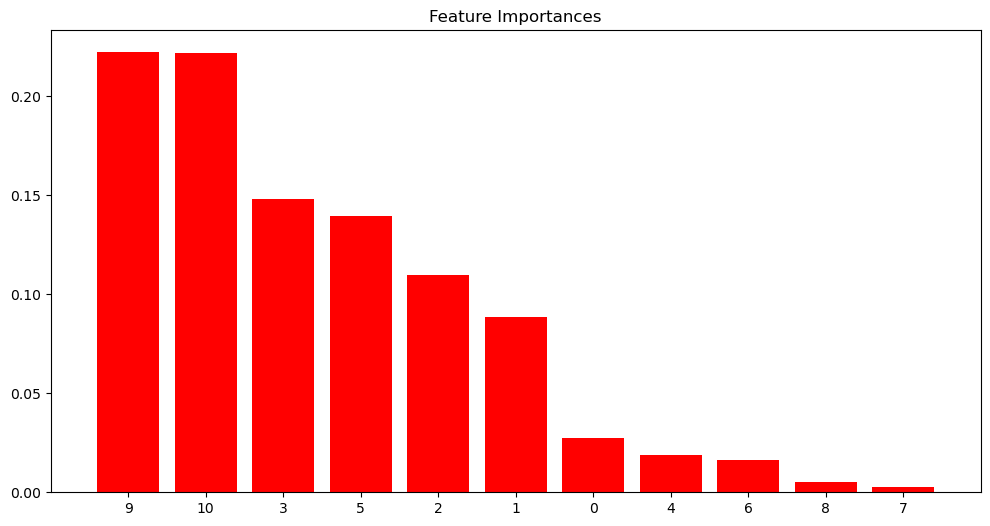

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

# Assuming you have a trained Random Forest model named 'best_grid'
# and your test set is named 'X_test' and 'y_test'

# Predictions
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 3. Feature Importance
feature_importances = best_grid.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train_smote.shape[1]), feature_importances[indices],
        color="r", align="center")
plt.xticks(range(X_train_smote.shape[1]), indices)
plt.xlim([-1, X_train_smote.shape[1]])
plt.show()


In [85]:
from sklearn.model_selection import GridSearchCV

# Assuming X_train_smote and y_train_smote are your training data and labels after applying SMOTE

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [4, 5, 6, 7, 8],  # Maximum number of levels in each decision tree
    'criterion': ['gini'],  # Function to measure the quality of a split
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Prediction using the best parameters
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)  # Assuming X_test is your test set

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))  # Assuming y_test is your test labels
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# ROC-AUC Score

Fitting 3 folds for each of 135 candidates, totalling 405 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.6140643457716628

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72     10287
           1       0.35      0.40      0.37      4104

    accuracy                           0.61     14391
   macro avg       0.55      0.55      0.55     14391
weighted avg       0.63      0.61      0.62     14391



In [86]:
# ROC-AUC Score
print("ROC-AUC Score for Random Forest:")
print(roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1]))

ROC-AUC Score for Random Forest:
0.5851608305567825


In [82]:
import xgboost as xgb

In [83]:
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_classifier.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgb_classifier.predict(X_test)


C:\Users\RACHAEL\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [84]:
# Classification Report
print("Accuracy: ")
print(accuracy_score(y_test, y_pred_xgb))

print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))

# ROC-AUC Score
print("ROC-AUC Score for XGBoost:")
print(roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:, 1]))


Accuracy: 
0.6226808421930373
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     10287
           1       0.36      0.40      0.38      4104

    accuracy                           0.62     14391
   macro avg       0.55      0.56      0.55     14391
weighted avg       0.64      0.62      0.63     14391

Confusion Matrix for XGBoost:
[[7311 2976]
 [2454 1650]]
ROC-AUC Score for XGBoost:
0.5879435398981019
